# PART C
# EXAMPLE B
# KNN CLASSIFICATION WITH HYPERPARAMETER TUNING

### INTRODUCTION

The k-nearest neighbors algorithm (KNN) is a supervised  machine learning algorithm, and it is a non-parametric method used for both regression and classification. KNN is based on feature similarity and can perform a KNN classifier classification. Under classification, KNN classifies a data point based on its neighbors' category. It tries to find similarities between the values and the predictors within the dataset.
KNN Classification is suitable for data with lower dimensionality. For KNN, normalize the data to the range[0,1] and standardize it if it follows a Gaussian distribution. Ensure that the data is clean and does not have any missing values.


### WORKING OF KNN ALGORITHM

Determine the k value. In `scikit-learn`, the default value of k is 5. The value of k generally depends on the problem.
This can now be used to calculate the distance of the new data with the training data , for which we can either implement Euclidean, Minkowski or Manhattan distance. In scikit-learn, the Euclidean distance is used by default.
For real-valued input variables, Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j [1].

$$EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) )$$

Next we have to calculate the distance, look for K-Neighbors closest to the new data.
Select the class of training data closest to the new data with the highest quality to find the new data class.
Calculate the accuracy of the model. If the accuracy is low, then perform hyperparameter tuning.


### UCI HEART DISEASE DATASET

Heart dataset is a multivariate type of dataset, involving a wide variety of statistical or mathematical variables, multivariate numerical data analysis [2]

Source of data- https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

The considered UCI heart database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. 

The `target` column refers to the presence of heart disease in a patient, it is integer values from `0 to 4`.

### Import the main libraries and packages 

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

### Import and read the dataset

In [27]:
df= pd.read_csv('dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# Dimensionality of the data frame
df.shape

(303, 14)

### Data description

Let's understand the meaning of each attribute of the dataset.

Age: Age opf the patient (in years)
Sex: Gender of the patient  (1 = male, 0 = female)
cp: Type of Chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: Resting blood pressure of the patient (mm Hg on admission to the hospital)
chol: The patient's cholesterol measured in mg/dl
fbs: The patient's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (Value 0 = normal, Value 1 = having ST-T wave abnormality,Value 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The patient's maximum heart rate achieved
exang: Exercise induced angina (Value 1 = yes; Value 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (Value 3 = normal;Value 6 = fixed defect;Value 7 = reversable defect)

### Data Statistics

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
# To display the summary statistics of the heart data frame
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
# To verify if there is any missing values in the data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset has 14 variables and 303 observations.
The dataset is clean without any missing values.

### Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='count'>

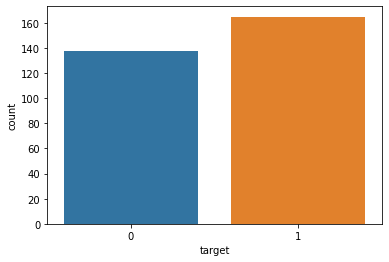

In [32]:
# Univariate analysis of target attribute
sns.countplot(df['target'])

The target feature is balanced. The number of patients predicted to have and not have heart disease is more or less the same.

<AxesSubplot:xlabel='age'>

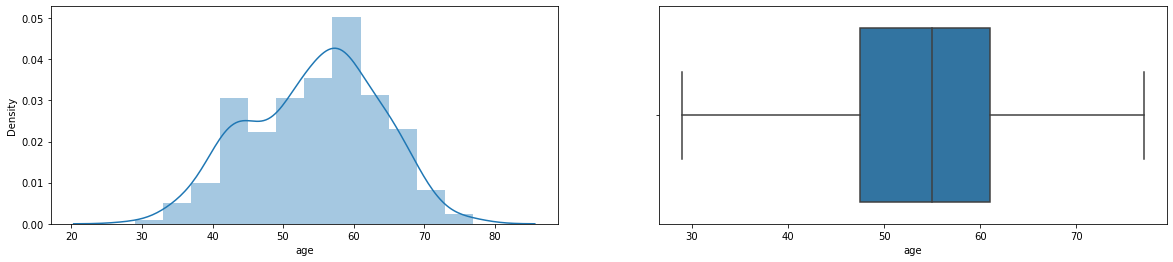

In [33]:
#Perform Univariate analysis of age feature.
a = plt.figure(figsize=(20,4))
a.add_subplot(1,2,1)
sns.distplot(df['age'])
a.add_subplot(1,2,2)
sns.boxplot(df['age'])

For age, Box plot depicts no outliers and the distplot shows that density of the data lies with the patients aged betweeen 50-60 years.
There are less data of patients aged 30 years and below and 80 yaers and above.

<AxesSubplot:xlabel='trestbps'>

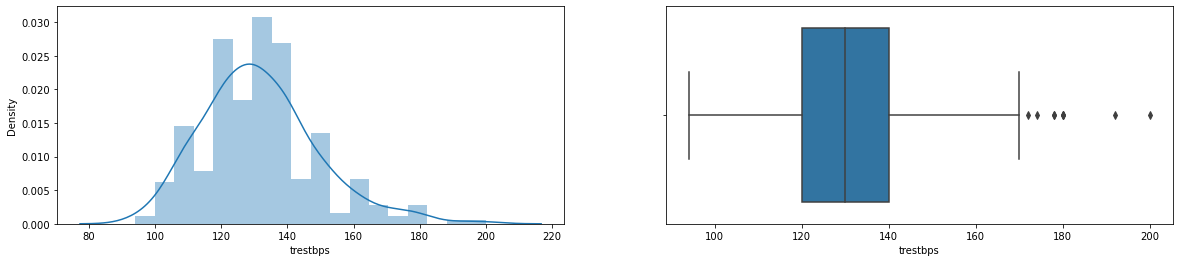

In [34]:
# Perform univariate analysis of resting blood pressure
a = plt.figure(figsize=(20,4))
a.add_subplot(1,2,1)
sns.distplot(df['trestbps'])
a.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])


For trestbps,Box plot depicts several outliers and distplot shows most of the values are ranged between 120 to 140 mmHg

<AxesSubplot:xlabel='fbs', ylabel='count'>

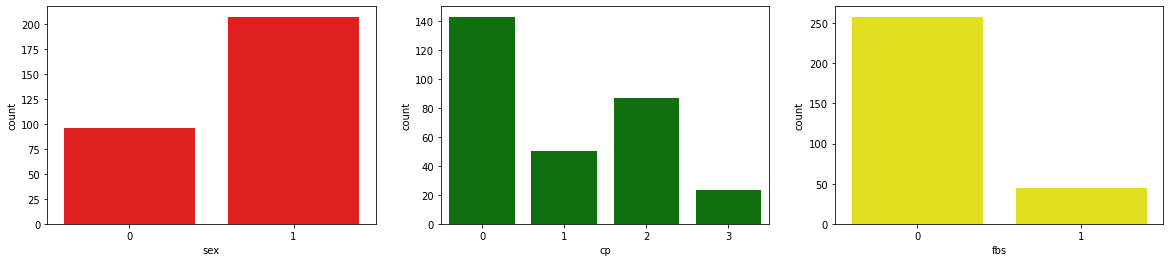

In [35]:
# Perform univariate analysis of sex, chest pain type and fasting blood sugar features
a = plt.figure(figsize=(20,4))

a.add_subplot(1,3,1)
sns.countplot(df['sex'], color='red')

a.add_subplot(1,3,2)
sns.countplot(df['cp'], color='green')

a.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

Most of the patients turns out to male.Number of male patients is 2 times greater than the number of female patients.
Most of the patients are prone to typical angine chest pain and least prone to type 3 (being aymptomatic).
Most of the patients have fasting blood sugar values below 120.


In [36]:
#Plot a correlation matrix 
df.corr().style.background_gradient().set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


From the above corrrelation matrix, we can witness a strong positive linear relationship of Target feature with chest pain(cp), maximum heart beat reached and slope of the peak excercise(slope).
There is a negative linear relationship of Target feature with exercise induced angina(exang), ST depression induced by exercise relative to rest (oldpeak),number of major vessels(ca) and thalassemia(thal) attributes.


### Model to Predict the heart condition of the patients using KNN Algorithm

In [37]:
# create a KNN object and seperate the feature and target label into 2 data frames x and y
knn = KNeighborsClassifier()
x=df.drop(columns=['target'])
y=df['target']

In [38]:
 # Split the data into trin and test data
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In the above code, we have split the main data into 85% training data and 20% test data. 
random_state will initialize the internal random number generator , which will split the data into train and test data

In [39]:
# Train the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
# Predict the test data
y_pred=knn.predict(x_test)

Now let's check the model performance using classification report. 
Classification report visualizer displays the precision, recall, F1 score and support score of the model.

Precision- Check the correct prediction percentage. 

Precision=True Positive/(True Positive+False Positive)


Recall- Ability of the classifier to find all the positive instances.

Recall= True Positive/(True Postive +False Negative)


F1 score - It is the weighted harmonic mean of precision (1 is the best score and 0 is the least)

F1 Score= 2*(Recall * Precision) / (Recall + Precision)

Support- Number of actual occurences of a class in the dataset. It is used to diagose the evaluation process.

In [41]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61



 From the report, it is clear that the model exihibits a average performance of 57% from precision, f1-score, recall and support.
The model even has a accuracy of 57%


In [42]:
# check the model performance using ROC score
roc_auc_score(y_test,y_pred)

0.5655555555555556

The AUC score is around 56.5% .The performance of the model is low. 


We can increase the performance of the model using Hyperparameter Tuning.


In [43]:
# List the Hyperparameters to be tuned.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
# Group the hyperparameters as a dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# Create a new KNN object
knn_2 = KNeighborsClassifier()



To find the best value of k within a range of values, use GridSearchCV.

GridSearchCV is used to train the model with multiple combinations of training hyper parameters. It will find the best combination of paramters and optimize the evaluation metric.

In [44]:
#Use GridSearchCV with cross validation batch size as 10
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [45]:
# Model fit
best_model = clf.fit(x,y)

In [46]:
# print the value of the best hyperparameters for the dataset
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 7


From GridSearch, it is seen that the best number of leaf_size is 5.

The best p value is 1 (Manhattan distance)

The optimal value of k is 7

In [47]:
y_pred = best_model.predict(x_test)

In [48]:
#Check the model performance after performing hyperparameter tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.81      0.81      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



By hyper parameter tuning, improved the performance of the model by 20% resulting in a accuracy of 77%. 

In [49]:
# Find the AUC score
roc_auc_score(y_test, y_pred)

0.7627777777777778

AUC score of the model has increased to 77%.

Hence,can brief that Hyper parameter tuning has resulted in increasing the performance of the model.


### REFERENCES

[1] Euclidean distance: https://ieeepcs-85169.medium.com/supervised-machine-learning-c5c7c5872ad9

[2] UCI heart disease dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/